In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Load data
data = pd.read_csv('iot23_combined.csv')

In [2]:
# Assuming 'label' is the name of the column containing your labels
unique_labels = data['label'].unique()
print(unique_labels)

['PartOfAHorizontalPortScan' 'Benign' 'Okiru' 'DDoS' 'C&C-HeartBeat'
 'C&C-Torii' 'C&C' 'Attack' 'C&C-FileDownload' 'FileDownload'
 'C&C-HeartBeat-FileDownload' 'C&C-Mirai']


In [3]:
data

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,99994,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1444670,99995,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1444671,99996,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0
1444672,99997,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0


In [4]:
# Mapping function to convert 'Benign' to 0 and others to 1
def map_label(label):
    if label == 'Benign':
        return 0
    elif label == 'PartOfAHorizontalPortScan':
        return 1
    elif label == 'Okiru':
        return 2
    elif label == 'DDoS':
        return 3
    elif label == 'C&C-HeartBeat':
        return 4
    elif label == 'C&C-Torii':
        return 4
    elif label == 'C&C':
        return 4
    elif label == 'C&C-FileDownload':
        return 4
    elif label == 'C&C-HeartBeat-FileDownload':
        return 4
    elif label == 'C&C-Mirai':
        return 4
    elif label == 'Attack':
        return 5
    elif label == 'FileDownload':
        return 5

# Apply the mapping function to the 'label' column
data['label'] = data['label'].apply(map_label)


In [5]:
data

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444669,99994,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1444670,99995,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1444671,99996,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0
1444672,99997,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,1,...,0,0,0,1,0,0,0,0,0,0


In [6]:
# Print the counts of each label
print(data['label'].value_counts())

label
1    825939
2    262690
0    197809
3    138777
4     15531
5      3928
Name: count, dtype: int64


In [7]:
# Filter out label 1 samples to keep 270,000
label_1_subset = data[data['label'] == 1].sample(n=170000, random_state=42)

# Combine the subset of label 1 with the rest of the data
balanced_data = pd.concat([label_1_subset, data[data['label'] != 1]])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42)

# Print the counts of each label in the balanced dataset
print(balanced_data['label'].value_counts())

label
2    262690
0    197809
1    170000
3    138777
4     15531
5      3928
Name: count, dtype: int64


In [8]:
data = balanced_data

In [9]:
print(data['label'].value_counts())

label
2    262690
0    197809
1    170000
3    138777
4     15531
5      3928
Name: count, dtype: int64


In [10]:
# Define the downsampling factor
downsample_factor = 1

# Get the count of the least represented class
min_class_count = balanced_data['label'].value_counts().min()

# Reduce each class to 10 times less than the count of the least represented class
downsampled_data = balanced_data.groupby('label').apply(lambda x: x.sample(n=min_class_count // downsample_factor))

# Shuffle the downsampled dataset
downsampled_data = downsampled_data.sample(frac=1, random_state=42)

# Print the counts of each label in the downsampled dataset
print(downsampled_data['label'].value_counts())
data = downsampled_data

label
4    3928
0    3928
1    3928
5    3928
3    3928
2    3928
Name: count, dtype: int64


In [11]:
from sklearn.model_selection import train_test_split

X = data.drop('label', axis=1)  # Features (all columns except 'label')
y = data['label']  # Target variable ('label' column)

# Split the data into training and testing sets (80% train, 20% test in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Epoch 1/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.8993 - accuracy: 0.6385 - val_loss: 0.8334 - val_accuracy: 0.6473
Epoch 2/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7981 - accuracy: 0.6563 - val_loss: 0.8021 - val_accuracy: 0.6558
Epoch 3/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7755 - accuracy: 0.6725 - val_loss: 0.7863 - val_accuracy: 0.6669
Epoch 4/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.6849 - val_loss: 0.7745 - val_accuracy: 0.6688
Epoch 5/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7400 - accuracy: 0.6936 - val_loss: 0.7620 - val_accuracy: 0.6754
Epoch 6/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7352 - accuracy: 0.6936 - val_loss: 0.7430 - val_accuracy: 0.6924
Epoch 7/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.7205 - accuracy: 0.7054 - val_loss: 0.7332 - val_accuracy:

258/258 [==============================] - 0s 2ms/step - loss: 0.4872 - accuracy: 0.8022 - val_loss: 0.5021 - val_accuracy: 0.7989
Epoch 58/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.8012 - val_loss: 0.5071 - val_accuracy: 0.7898
Epoch 59/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4850 - accuracy: 0.8018 - val_loss: 0.4929 - val_accuracy: 0.8029
Epoch 60/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4817 - accuracy: 0.8027 - val_loss: 0.4943 - val_accuracy: 0.7959
Epoch 61/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.8028 - val_loss: 0.5142 - val_accuracy: 0.7975
Epoch 62/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7995 - val_loss: 0.5068 - val_accuracy: 0.8012
Epoch 63/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4818 - accuracy: 0.8027 - val_loss: 0.5013 - val_accuracy: 0.8009

258/258 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8043 - val_loss: 0.4841 - val_accuracy: 0.8040
Epoch 114/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8039 - val_loss: 0.4979 - val_accuracy: 0.8007
Epoch 115/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.8064 - val_loss: 0.4997 - val_accuracy: 0.8003
Epoch 116/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8049 - val_loss: 0.4939 - val_accuracy: 0.8029
Epoch 117/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.8035 - val_loss: 0.4877 - val_accuracy: 0.8021
Epoch 118/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.8044 - val_loss: 0.4954 - val_accuracy: 0.8005
Epoch 119/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4728 - accuracy: 0.8061 - val_loss: 0.5002 - val_accuracy: 

258/258 [==============================] - 1s 2ms/step - loss: 0.4694 - accuracy: 0.8078 - val_loss: 0.4873 - val_accuracy: 0.8054
Epoch 170/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4673 - accuracy: 0.8084 - val_loss: 0.4823 - val_accuracy: 0.8053
Epoch 171/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.8091 - val_loss: 0.4948 - val_accuracy: 0.7972
Epoch 172/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4676 - accuracy: 0.8069 - val_loss: 0.4852 - val_accuracy: 0.8041
Epoch 173/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4678 - accuracy: 0.8078 - val_loss: 0.5008 - val_accuracy: 0.7978
Epoch 174/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4687 - accuracy: 0.8093 - val_loss: 0.4819 - val_accuracy: 0.8036
Epoch 175/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4664 - accuracy: 0.8091 - val_loss: 0.4897 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8106 - val_loss: 0.4911 - val_accuracy: 0.8078
Epoch 226/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8116 - val_loss: 0.4810 - val_accuracy: 0.8084
Epoch 227/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4615 - accuracy: 0.8106 - val_loss: 0.4857 - val_accuracy: 0.8096
Epoch 228/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4624 - accuracy: 0.8114 - val_loss: 0.4802 - val_accuracy: 0.8106
Epoch 229/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4602 - accuracy: 0.8107 - val_loss: 0.4829 - val_accuracy: 0.8091
Epoch 230/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.8114 - val_loss: 0.4983 - val_accuracy: 0.7962
Epoch 231/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4600 - accuracy: 0.8105 - val_loss: 0.4836 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4542 - accuracy: 0.8131 - val_loss: 0.4801 - val_accuracy: 0.8106
Epoch 282/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4550 - accuracy: 0.8127 - val_loss: 0.4865 - val_accuracy: 0.8115
Epoch 283/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8125 - val_loss: 0.4888 - val_accuracy: 0.8094
Epoch 284/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4545 - accuracy: 0.8131 - val_loss: 0.4803 - val_accuracy: 0.8120
Epoch 285/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8132 - val_loss: 0.4776 - val_accuracy: 0.8111
Epoch 286/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4523 - accuracy: 0.8141 - val_loss: 0.4806 - val_accuracy: 0.8108
Epoch 287/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4551 - accuracy: 0.8131 - val_loss: 0.4841 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4519 - accuracy: 0.8140 - val_loss: 0.4908 - val_accuracy: 0.8102
Epoch 338/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8143 - val_loss: 0.4828 - val_accuracy: 0.8115
Epoch 339/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4532 - accuracy: 0.8140 - val_loss: 0.4915 - val_accuracy: 0.8111
Epoch 340/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.8139 - val_loss: 0.4887 - val_accuracy: 0.8122
Epoch 341/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8143 - val_loss: 0.4883 - val_accuracy: 0.8105
Epoch 342/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8134 - val_loss: 0.4869 - val_accuracy: 0.8125
Epoch 343/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8143 - val_loss: 0.4850 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4505 - accuracy: 0.8146 - val_loss: 0.4842 - val_accuracy: 0.8126
Epoch 394/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8148 - val_loss: 0.4969 - val_accuracy: 0.8118
Epoch 395/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8131 - val_loss: 0.4876 - val_accuracy: 0.8128
Epoch 396/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8143 - val_loss: 0.4849 - val_accuracy: 0.8115
Epoch 397/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4491 - accuracy: 0.8137 - val_loss: 0.4890 - val_accuracy: 0.8106
Epoch 398/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8128 - val_loss: 0.5002 - val_accuracy: 0.8106
Epoch 399/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8140 - val_loss: 0.4861 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8146 - val_loss: 0.4914 - val_accuracy: 0.8079
Epoch 450/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.8142 - val_loss: 0.4909 - val_accuracy: 0.8116
Epoch 451/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8149 - val_loss: 0.4891 - val_accuracy: 0.8109
Epoch 452/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.8146 - val_loss: 0.4862 - val_accuracy: 0.8113
Epoch 453/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4528 - accuracy: 0.8143 - val_loss: 0.4927 - val_accuracy: 0.8119
Epoch 454/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4509 - accuracy: 0.8147 - val_loss: 0.4890 - val_accuracy: 0.8118
Epoch 455/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4510 - accuracy: 0.8147 - val_loss: 0.4920 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4514 - accuracy: 0.8151 - val_loss: 0.4922 - val_accuracy: 0.8120
Epoch 506/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8152 - val_loss: 0.4902 - val_accuracy: 0.8116
Epoch 507/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8150 - val_loss: 0.4888 - val_accuracy: 0.8112
Epoch 508/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4496 - accuracy: 0.8151 - val_loss: 0.5049 - val_accuracy: 0.8079
Epoch 509/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8142 - val_loss: 0.4896 - val_accuracy: 0.8130
Epoch 510/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4497 - accuracy: 0.8149 - val_loss: 0.4897 - val_accuracy: 0.8113
Epoch 511/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8150 - val_loss: 0.4883 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4490 - accuracy: 0.8144 - val_loss: 0.4914 - val_accuracy: 0.8109
Epoch 562/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4480 - accuracy: 0.8146 - val_loss: 0.4982 - val_accuracy: 0.8111
Epoch 563/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8154 - val_loss: 0.4983 - val_accuracy: 0.8112
Epoch 564/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4507 - accuracy: 0.8148 - val_loss: 0.4895 - val_accuracy: 0.8135
Epoch 565/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8151 - val_loss: 0.4886 - val_accuracy: 0.8116
Epoch 566/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4487 - accuracy: 0.8140 - val_loss: 0.4897 - val_accuracy: 0.8120
Epoch 567/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4471 - accuracy: 0.8149 - val_loss: 0.4873 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4479 - accuracy: 0.8151 - val_loss: 0.4850 - val_accuracy: 0.8129
Epoch 618/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8154 - val_loss: 0.4873 - val_accuracy: 0.8119
Epoch 619/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4473 - accuracy: 0.8144 - val_loss: 0.4871 - val_accuracy: 0.8125
Epoch 620/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8158 - val_loss: 0.4875 - val_accuracy: 0.8128
Epoch 621/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4494 - accuracy: 0.8151 - val_loss: 0.4905 - val_accuracy: 0.8125
Epoch 622/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8152 - val_loss: 0.4983 - val_accuracy: 0.8123
Epoch 623/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4484 - accuracy: 0.8144 - val_loss: 0.4879 - val_accuracy: 

258/258 [==============================] - 1s 2ms/step - loss: 0.4471 - accuracy: 0.8151 - val_loss: 0.4891 - val_accuracy: 0.8129
Epoch 674/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4461 - accuracy: 0.8146 - val_loss: 0.4922 - val_accuracy: 0.8132
Epoch 675/1800
258/258 [==============================] - 1s 3ms/step - loss: 0.4524 - accuracy: 0.8131 - val_loss: 0.4992 - val_accuracy: 0.8112
Epoch 676/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4547 - accuracy: 0.8145 - val_loss: 0.4923 - val_accuracy: 0.8119
Epoch 677/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4503 - accuracy: 0.8148 - val_loss: 0.5004 - val_accuracy: 0.8129
Epoch 678/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4508 - accuracy: 0.8149 - val_loss: 0.4951 - val_accuracy: 0.8128
Epoch 679/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4469 - accuracy: 0.8146 - val_loss: 0.4963 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.8149 - val_loss: 0.5009 - val_accuracy: 0.8135
Epoch 730/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4512 - accuracy: 0.8151 - val_loss: 0.4959 - val_accuracy: 0.8130
Epoch 731/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4493 - accuracy: 0.8149 - val_loss: 0.4903 - val_accuracy: 0.8128
Epoch 732/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8149 - val_loss: 0.4929 - val_accuracy: 0.8132
Epoch 733/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4460 - accuracy: 0.8154 - val_loss: 0.4916 - val_accuracy: 0.8130
Epoch 734/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4461 - accuracy: 0.8154 - val_loss: 0.4896 - val_accuracy: 0.8135
Epoch 735/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8155 - val_loss: 0.4893 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8150 - val_loss: 0.5048 - val_accuracy: 0.8115
Epoch 786/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4468 - accuracy: 0.8152 - val_loss: 0.4958 - val_accuracy: 0.8135
Epoch 787/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8158 - val_loss: 0.4960 - val_accuracy: 0.8125
Epoch 788/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8151 - val_loss: 0.5037 - val_accuracy: 0.8113
Epoch 789/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4452 - accuracy: 0.8154 - val_loss: 0.4954 - val_accuracy: 0.8126
Epoch 790/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8158 - val_loss: 0.4953 - val_accuracy: 0.8120
Epoch 791/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8153 - val_loss: 0.4944 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4455 - accuracy: 0.8157 - val_loss: 0.5002 - val_accuracy: 0.8130
Epoch 842/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8149 - val_loss: 0.4994 - val_accuracy: 0.8133
Epoch 843/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4469 - accuracy: 0.8152 - val_loss: 0.5102 - val_accuracy: 0.8129
Epoch 844/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8152 - val_loss: 0.5014 - val_accuracy: 0.8133
Epoch 845/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8159 - val_loss: 0.5027 - val_accuracy: 0.8120
Epoch 846/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4457 - accuracy: 0.8154 - val_loss: 0.4998 - val_accuracy: 0.8129
Epoch 847/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.8158 - val_loss: 0.5029 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4453 - accuracy: 0.8158 - val_loss: 0.5045 - val_accuracy: 0.8106
Epoch 898/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4438 - accuracy: 0.8159 - val_loss: 0.4988 - val_accuracy: 0.8129
Epoch 899/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8155 - val_loss: 0.4979 - val_accuracy: 0.8133
Epoch 900/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8161 - val_loss: 0.5040 - val_accuracy: 0.8129
Epoch 901/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4458 - accuracy: 0.8154 - val_loss: 0.5008 - val_accuracy: 0.8123
Epoch 902/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8156 - val_loss: 0.5018 - val_accuracy: 0.8133
Epoch 903/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8155 - val_loss: 0.5042 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.8161 - val_loss: 0.4974 - val_accuracy: 0.8135
Epoch 954/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4447 - accuracy: 0.8149 - val_loss: 0.5114 - val_accuracy: 0.8133
Epoch 955/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4440 - accuracy: 0.8156 - val_loss: 0.4993 - val_accuracy: 0.8128
Epoch 956/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4434 - accuracy: 0.8155 - val_loss: 0.5053 - val_accuracy: 0.8128
Epoch 957/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4449 - accuracy: 0.8159 - val_loss: 0.4920 - val_accuracy: 0.8143
Epoch 958/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8158 - val_loss: 0.4957 - val_accuracy: 0.8132
Epoch 959/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4450 - accuracy: 0.8153 - val_loss: 0.4946 - val_accuracy: 

258/258 [==============================] - 0s 2ms/step - loss: 0.4439 - accuracy: 0.8156 - val_loss: 0.4991 - val_accuracy: 0.8135
Epoch 1010/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4433 - accuracy: 0.8155 - val_loss: 0.4956 - val_accuracy: 0.8132
Epoch 1011/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8161 - val_loss: 0.4955 - val_accuracy: 0.8137
Epoch 1012/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8157 - val_loss: 0.4975 - val_accuracy: 0.8136
Epoch 1013/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8154 - val_loss: 0.5229 - val_accuracy: 0.8112
Epoch 1014/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4454 - accuracy: 0.8157 - val_loss: 0.4962 - val_accuracy: 0.8116
Epoch 1015/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8155 - val_loss: 0.4998 - val_accu

Epoch 1065/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4428 - accuracy: 0.8158 - val_loss: 0.4966 - val_accuracy: 0.8135
Epoch 1066/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.8156 - val_loss: 0.4970 - val_accuracy: 0.8137
Epoch 1067/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4427 - accuracy: 0.8157 - val_loss: 0.5012 - val_accuracy: 0.8125
Epoch 1068/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.8157 - val_loss: 0.4980 - val_accuracy: 0.8139
Epoch 1069/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8151 - val_loss: 0.4974 - val_accuracy: 0.8142
Epoch 1070/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8156 - val_loss: 0.4970 - val_accuracy: 0.8139
Epoch 1071/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8151 - val_loss: 0

Epoch 1121/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.8152 - val_loss: 0.5004 - val_accuracy: 0.8137
Epoch 1122/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4426 - accuracy: 0.8163 - val_loss: 0.5053 - val_accuracy: 0.8128
Epoch 1123/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8160 - val_loss: 0.5004 - val_accuracy: 0.8140
Epoch 1124/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4430 - accuracy: 0.8163 - val_loss: 0.5015 - val_accuracy: 0.8125
Epoch 1125/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8156 - val_loss: 0.5001 - val_accuracy: 0.8130
Epoch 1126/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8160 - val_loss: 0.5023 - val_accuracy: 0.8133
Epoch 1127/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8160 - val_loss: 0

Epoch 1177/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4432 - accuracy: 0.8153 - val_loss: 0.4979 - val_accuracy: 0.8129
Epoch 1178/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8161 - val_loss: 0.4973 - val_accuracy: 0.8130
Epoch 1179/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4437 - accuracy: 0.8146 - val_loss: 0.5033 - val_accuracy: 0.8123
Epoch 1180/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8160 - val_loss: 0.4977 - val_accuracy: 0.8129
Epoch 1181/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4423 - accuracy: 0.8157 - val_loss: 0.4972 - val_accuracy: 0.8129
Epoch 1182/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8156 - val_loss: 0.4977 - val_accuracy: 0.8126
Epoch 1183/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8166 - val_loss: 0

Epoch 1233/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8160 - val_loss: 0.5027 - val_accuracy: 0.8132
Epoch 1234/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8162 - val_loss: 0.5062 - val_accuracy: 0.8130
Epoch 1235/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4416 - accuracy: 0.8161 - val_loss: 0.5006 - val_accuracy: 0.8133
Epoch 1236/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4411 - accuracy: 0.8157 - val_loss: 0.5023 - val_accuracy: 0.8128
Epoch 1237/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8160 - val_loss: 0.5062 - val_accuracy: 0.8119
Epoch 1238/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8159 - val_loss: 0.5009 - val_accuracy: 0.8136
Epoch 1239/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8160 - val_loss: 0

Epoch 1289/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8161 - val_loss: 0.5015 - val_accuracy: 0.8128
Epoch 1290/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8163 - val_loss: 0.5017 - val_accuracy: 0.8137
Epoch 1291/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4417 - accuracy: 0.8166 - val_loss: 0.5030 - val_accuracy: 0.8126
Epoch 1292/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4466 - accuracy: 0.8158 - val_loss: 0.5122 - val_accuracy: 0.8123
Epoch 1293/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8160 - val_loss: 0.5016 - val_accuracy: 0.8139
Epoch 1294/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4413 - accuracy: 0.8163 - val_loss: 0.5033 - val_accuracy: 0.8135
Epoch 1295/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4413 - accuracy: 0.8158 - val_loss: 0

Epoch 1345/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4418 - accuracy: 0.8160 - val_loss: 0.5000 - val_accuracy: 0.8143
Epoch 1346/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8163 - val_loss: 0.5027 - val_accuracy: 0.8128
Epoch 1347/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8161 - val_loss: 0.5052 - val_accuracy: 0.8137
Epoch 1348/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4421 - accuracy: 0.8163 - val_loss: 0.5077 - val_accuracy: 0.8137
Epoch 1349/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4432 - accuracy: 0.8150 - val_loss: 0.5038 - val_accuracy: 0.8129
Epoch 1350/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4410 - accuracy: 0.8165 - val_loss: 0.4986 - val_accuracy: 0.8139
Epoch 1351/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8168 - val_loss: 0

Epoch 1401/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8161 - val_loss: 0.4958 - val_accuracy: 0.8143
Epoch 1402/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4409 - accuracy: 0.8159 - val_loss: 0.4991 - val_accuracy: 0.8142
Epoch 1403/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8160 - val_loss: 0.5118 - val_accuracy: 0.8132
Epoch 1404/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4419 - accuracy: 0.8160 - val_loss: 0.4962 - val_accuracy: 0.8145
Epoch 1405/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8165 - val_loss: 0.4956 - val_accuracy: 0.8142
Epoch 1406/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8164 - val_loss: 0.4948 - val_accuracy: 0.8142
Epoch 1407/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8163 - val_loss: 0

Epoch 1457/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8168 - val_loss: 0.5143 - val_accuracy: 0.8135
Epoch 1458/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8164 - val_loss: 0.5153 - val_accuracy: 0.8142
Epoch 1459/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8165 - val_loss: 0.5177 - val_accuracy: 0.8132
Epoch 1460/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4412 - accuracy: 0.8161 - val_loss: 0.5139 - val_accuracy: 0.8139
Epoch 1461/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8166 - val_loss: 0.5126 - val_accuracy: 0.8135
Epoch 1462/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8158 - val_loss: 0.5134 - val_accuracy: 0.8140
Epoch 1463/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8164 - val_loss: 0

Epoch 1513/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8162 - val_loss: 0.5126 - val_accuracy: 0.8135
Epoch 1514/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4399 - accuracy: 0.8166 - val_loss: 0.5111 - val_accuracy: 0.8129
Epoch 1515/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4406 - accuracy: 0.8162 - val_loss: 0.5095 - val_accuracy: 0.8136
Epoch 1516/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4392 - accuracy: 0.8163 - val_loss: 0.5092 - val_accuracy: 0.8137
Epoch 1517/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4406 - accuracy: 0.8165 - val_loss: 0.5091 - val_accuracy: 0.8136
Epoch 1518/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8158 - val_loss: 0.5095 - val_accuracy: 0.8128
Epoch 1519/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4401 - accuracy: 0.8160 - val_loss: 0

Epoch 1569/1800
258/258 [==============================] - 1s 2ms/step - loss: 0.4407 - accuracy: 0.8163 - val_loss: 0.5102 - val_accuracy: 0.8136
Epoch 1570/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8162 - val_loss: 0.5094 - val_accuracy: 0.8143
Epoch 1571/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4397 - accuracy: 0.8163 - val_loss: 0.5173 - val_accuracy: 0.8123
Epoch 1572/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4396 - accuracy: 0.8163 - val_loss: 0.5081 - val_accuracy: 0.8140
Epoch 1573/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8163 - val_loss: 0.5118 - val_accuracy: 0.8132
Epoch 1574/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8163 - val_loss: 0.5115 - val_accuracy: 0.8133
Epoch 1575/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8166 - val_loss: 0

Epoch 1625/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8168 - val_loss: 0.5053 - val_accuracy: 0.8139
Epoch 1626/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8164 - val_loss: 0.5019 - val_accuracy: 0.8147
Epoch 1627/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4391 - accuracy: 0.8170 - val_loss: 0.5020 - val_accuracy: 0.8135
Epoch 1628/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8163 - val_loss: 0.5029 - val_accuracy: 0.8143
Epoch 1629/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8161 - val_loss: 0.5078 - val_accuracy: 0.8136
Epoch 1630/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.8169 - val_loss: 0.5029 - val_accuracy: 0.8140
Epoch 1631/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8166 - val_loss: 0

Epoch 1681/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4403 - accuracy: 0.8160 - val_loss: 0.5043 - val_accuracy: 0.8137
Epoch 1682/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8164 - val_loss: 0.5020 - val_accuracy: 0.8136
Epoch 1683/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8162 - val_loss: 0.5055 - val_accuracy: 0.8137
Epoch 1684/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8168 - val_loss: 0.5033 - val_accuracy: 0.8133
Epoch 1685/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8160 - val_loss: 0.5102 - val_accuracy: 0.8139
Epoch 1686/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8168 - val_loss: 0.4988 - val_accuracy: 0.8140
Epoch 1687/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4407 - accuracy: 0.8164 - val_loss: 0

Epoch 1737/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4385 - accuracy: 0.8166 - val_loss: 0.5003 - val_accuracy: 0.8120
Epoch 1738/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8166 - val_loss: 0.5031 - val_accuracy: 0.8139
Epoch 1739/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8166 - val_loss: 0.5055 - val_accuracy: 0.8137
Epoch 1740/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8166 - val_loss: 0.5042 - val_accuracy: 0.8137
Epoch 1741/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4400 - accuracy: 0.8164 - val_loss: 0.5066 - val_accuracy: 0.8142
Epoch 1742/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.8169 - val_loss: 0.4986 - val_accuracy: 0.8136
Epoch 1743/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8160 - val_loss: 0

Epoch 1793/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8172 - val_loss: 0.5092 - val_accuracy: 0.8143
Epoch 1794/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4390 - accuracy: 0.8164 - val_loss: 0.5068 - val_accuracy: 0.8142
Epoch 1795/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.8164 - val_loss: 0.5088 - val_accuracy: 0.8145
Epoch 1796/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4389 - accuracy: 0.8163 - val_loss: 0.5074 - val_accuracy: 0.8145
Epoch 1797/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4387 - accuracy: 0.8166 - val_loss: 0.5087 - val_accuracy: 0.8146
Epoch 1798/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8163 - val_loss: 0.5071 - val_accuracy: 0.8150
Epoch 1799/1800
258/258 [==============================] - 0s 2ms/step - loss: 0.4398 - accuracy: 0.8163 - val_loss: 0

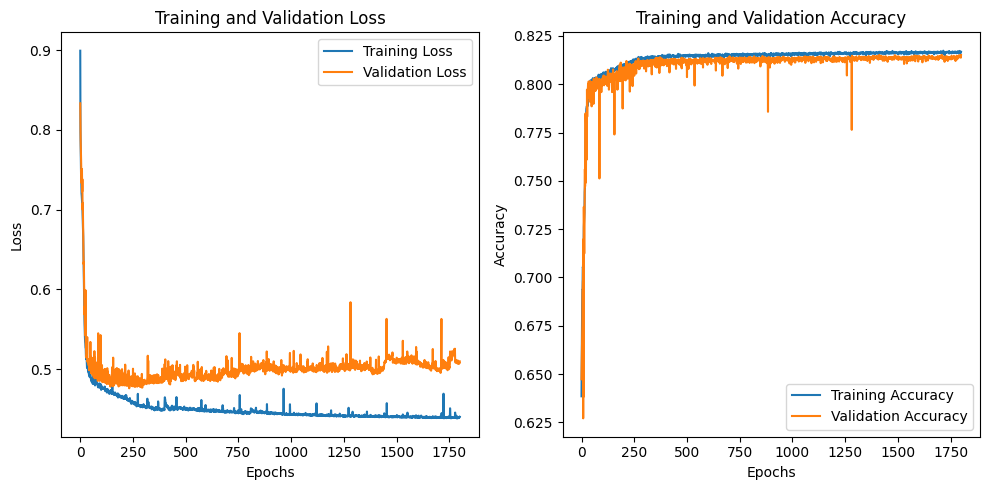

In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import matplotlib.pyplot as plt
# Assuming you have already encoded the labels
# X_train, X_test, y_train, y_test = ... (your train_test_split data)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))  # Assuming you have 6 classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Conv1D input (assuming your features are in 2D)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
history = model.fit(X_train, y_train, epochs=1800, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



221/221 [==============================] - 0s 701us/step


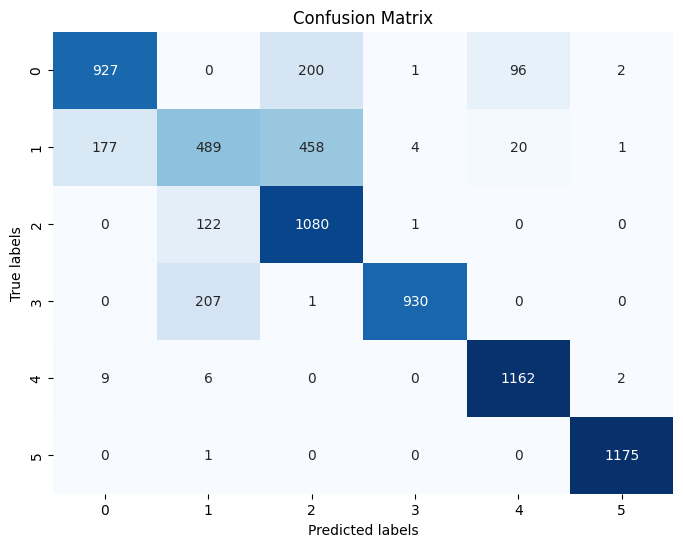


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1226
           1       0.59      0.43      0.50      1149
           2       0.62      0.90      0.73      1203
           3       0.99      0.82      0.90      1138
           4       0.91      0.99      0.95      1179
           5       1.00      1.00      1.00      1176

    accuracy                           0.82      7071
   macro avg       0.82      0.81      0.81      7071
weighted avg       0.82      0.82      0.81      7071



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
y_pred_prob_1 = model.predict(X_test)

# Derive predicted classes from probabilities
y_pred_1 = np.argmax(y_pred_prob_1, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_1)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_1)
print("\nClassification Report:")
print(class_report)

Epoch 1/1000
258/258 [==============================] - 5s 14ms/step - loss: 0.9039 - accuracy: 0.6354 - val_loss: 1.3640 - val_accuracy: 0.4002
Epoch 2/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.7937 - accuracy: 0.6692 - val_loss: 0.8785 - val_accuracy: 0.6320
Epoch 3/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.7640 - accuracy: 0.6825 - val_loss: 0.7669 - val_accuracy: 0.7220
Epoch 4/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.7293 - accuracy: 0.7006 - val_loss: 0.7064 - val_accuracy: 0.6916
Epoch 5/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.6862 - accuracy: 0.7203 - val_loss: 0.6813 - val_accuracy: 0.7024
Epoch 6/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.6488 - accuracy: 0.7267 - val_loss: 0.6359 - val_accuracy: 0.7324
Epoch 7/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.6316 - accuracy: 0.7317 - val_loss: 0.6018 - val_ac

258/258 [==============================] - 3s 11ms/step - loss: 0.4627 - accuracy: 0.8093 - val_loss: 0.4791 - val_accuracy: 0.8089
Epoch 58/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4648 - accuracy: 0.8074 - val_loss: 0.4761 - val_accuracy: 0.8095
Epoch 59/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4659 - accuracy: 0.8085 - val_loss: 0.5102 - val_accuracy: 0.7961
Epoch 60/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4691 - accuracy: 0.8063 - val_loss: 0.5024 - val_accuracy: 0.7938
Epoch 61/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4806 - accuracy: 0.8033 - val_loss: 0.4921 - val_accuracy: 0.8040
Epoch 62/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4690 - accuracy: 0.8075 - val_loss: 0.4803 - val_accuracy: 0.8088
Epoch 63/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4623 - accuracy: 0.8094 - val_loss: 0.4757 - val_accuracy:

258/258 [==============================] - 3s 12ms/step - loss: 0.4602 - accuracy: 0.8096 - val_loss: 0.4753 - val_accuracy: 0.8078
Epoch 114/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4621 - accuracy: 0.8095 - val_loss: 0.4825 - val_accuracy: 0.8063
Epoch 115/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4614 - accuracy: 0.8098 - val_loss: 0.4873 - val_accuracy: 0.8055
Epoch 116/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4598 - accuracy: 0.8094 - val_loss: 0.4833 - val_accuracy: 0.8088
Epoch 117/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4639 - accuracy: 0.8079 - val_loss: 0.4881 - val_accuracy: 0.8024
Epoch 118/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4597 - accuracy: 0.8102 - val_loss: 0.4800 - val_accuracy: 0.8079
Epoch 119/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4620 - accuracy: 0.8101 - val_loss: 0.4852 - val_acc

Epoch 169/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4574 - accuracy: 0.8105 - val_loss: 0.4890 - val_accuracy: 0.8081
Epoch 170/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4599 - accuracy: 0.8104 - val_loss: 0.4774 - val_accuracy: 0.8108
Epoch 171/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4576 - accuracy: 0.8110 - val_loss: 0.4808 - val_accuracy: 0.8089
Epoch 172/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4586 - accuracy: 0.8102 - val_loss: 0.4823 - val_accuracy: 0.8109
Epoch 173/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4554 - accuracy: 0.8117 - val_loss: 0.4790 - val_accuracy: 0.8094
Epoch 174/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4581 - accuracy: 0.8105 - val_loss: 0.4746 - val_accuracy: 0.8115
Epoch 175/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4564 - accuracy: 0.8113 - val_loss: 0

Epoch 225/1000
258/258 [==============================] - 3s 10ms/step - loss: 0.4543 - accuracy: 0.8128 - val_loss: 0.4763 - val_accuracy: 0.8089
Epoch 226/1000
258/258 [==============================] - 3s 10ms/step - loss: 0.4527 - accuracy: 0.8125 - val_loss: 0.4790 - val_accuracy: 0.8129
Epoch 227/1000
258/258 [==============================] - 3s 10ms/step - loss: 0.4543 - accuracy: 0.8121 - val_loss: 0.4733 - val_accuracy: 0.8118
Epoch 228/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4510 - accuracy: 0.8141 - val_loss: 0.4737 - val_accuracy: 0.8115
Epoch 229/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4523 - accuracy: 0.8147 - val_loss: 0.4766 - val_accuracy: 0.8109
Epoch 230/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4531 - accuracy: 0.8125 - val_loss: 0.4683 - val_accuracy: 0.8129
Epoch 231/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4514 - accuracy: 0.8135 - val_loss: 0

Epoch 281/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4517 - accuracy: 0.8133 - val_loss: 0.4754 - val_accuracy: 0.8128
Epoch 282/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4501 - accuracy: 0.8135 - val_loss: 0.4730 - val_accuracy: 0.8123
Epoch 283/1000
258/258 [==============================] - 3s 10ms/step - loss: 0.4541 - accuracy: 0.8126 - val_loss: 0.4737 - val_accuracy: 0.8128
Epoch 284/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4487 - accuracy: 0.8141 - val_loss: 0.4797 - val_accuracy: 0.8082
Epoch 285/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4517 - accuracy: 0.8137 - val_loss: 0.4787 - val_accuracy: 0.8126
Epoch 286/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4498 - accuracy: 0.8141 - val_loss: 0.4792 - val_accuracy: 0.8113
Epoch 287/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4481 - accuracy: 0.8143 - val_loss: 0

Epoch 337/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4488 - accuracy: 0.8131 - val_loss: 0.4801 - val_accuracy: 0.8118
Epoch 338/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4484 - accuracy: 0.8140 - val_loss: 0.4821 - val_accuracy: 0.8109
Epoch 339/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4487 - accuracy: 0.8137 - val_loss: 0.4811 - val_accuracy: 0.8123
Epoch 340/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4485 - accuracy: 0.8143 - val_loss: 0.4779 - val_accuracy: 0.8104
Epoch 341/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4466 - accuracy: 0.8143 - val_loss: 0.4760 - val_accuracy: 0.8118
Epoch 342/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4481 - accuracy: 0.8143 - val_loss: 0.4750 - val_accuracy: 0.8132
Epoch 343/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4500 - accuracy: 0.8125 - val_loss: 0

Epoch 393/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4474 - accuracy: 0.8142 - val_loss: 0.5114 - val_accuracy: 0.8070
Epoch 394/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4487 - accuracy: 0.8137 - val_loss: 0.4832 - val_accuracy: 0.8125
Epoch 395/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4472 - accuracy: 0.8151 - val_loss: 0.4834 - val_accuracy: 0.8135
Epoch 396/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4479 - accuracy: 0.8137 - val_loss: 0.4892 - val_accuracy: 0.8109
Epoch 397/1000
258/258 [==============================] - 3s 10ms/step - loss: 0.4468 - accuracy: 0.8143 - val_loss: 0.4844 - val_accuracy: 0.8122
Epoch 398/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4458 - accuracy: 0.8152 - val_loss: 0.4828 - val_accuracy: 0.8136
Epoch 399/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4454 - accuracy: 0.8153 - val_loss: 0

Epoch 449/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4478 - accuracy: 0.8144 - val_loss: 0.4815 - val_accuracy: 0.8128
Epoch 450/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4447 - accuracy: 0.8151 - val_loss: 0.4801 - val_accuracy: 0.8136
Epoch 451/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4475 - accuracy: 0.8149 - val_loss: 0.4815 - val_accuracy: 0.8130
Epoch 452/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4458 - accuracy: 0.8145 - val_loss: 0.4822 - val_accuracy: 0.8118
Epoch 453/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4439 - accuracy: 0.8152 - val_loss: 0.4782 - val_accuracy: 0.8136
Epoch 454/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4451 - accuracy: 0.8145 - val_loss: 0.4811 - val_accuracy: 0.8128
Epoch 455/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4462 - accuracy: 0.8148 - val_loss: 0

Epoch 505/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4470 - accuracy: 0.8138 - val_loss: 0.4824 - val_accuracy: 0.8137
Epoch 506/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4440 - accuracy: 0.8153 - val_loss: 0.4874 - val_accuracy: 0.8133
Epoch 507/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4458 - accuracy: 0.8138 - val_loss: 0.4860 - val_accuracy: 0.8140
Epoch 508/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4456 - accuracy: 0.8143 - val_loss: 0.4860 - val_accuracy: 0.8142
Epoch 509/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4452 - accuracy: 0.8151 - val_loss: 0.4855 - val_accuracy: 0.8118
Epoch 510/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4438 - accuracy: 0.8159 - val_loss: 0.4855 - val_accuracy: 0.8130
Epoch 511/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4459 - accuracy: 0.8143 - val_loss: 0

Epoch 561/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4452 - accuracy: 0.8155 - val_loss: 0.4822 - val_accuracy: 0.8123
Epoch 562/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4456 - accuracy: 0.8143 - val_loss: 0.4851 - val_accuracy: 0.8135
Epoch 563/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4463 - accuracy: 0.8149 - val_loss: 0.4880 - val_accuracy: 0.8106
Epoch 564/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4447 - accuracy: 0.8145 - val_loss: 0.4803 - val_accuracy: 0.8145
Epoch 565/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4439 - accuracy: 0.8155 - val_loss: 0.4847 - val_accuracy: 0.8108
Epoch 566/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4457 - accuracy: 0.8151 - val_loss: 0.4898 - val_accuracy: 0.8112
Epoch 567/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4436 - accuracy: 0.8157 - val_loss: 0

Epoch 617/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4459 - accuracy: 0.8153 - val_loss: 0.4868 - val_accuracy: 0.8125
Epoch 618/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4418 - accuracy: 0.8160 - val_loss: 0.4863 - val_accuracy: 0.8139
Epoch 619/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4438 - accuracy: 0.8146 - val_loss: 0.4898 - val_accuracy: 0.8132
Epoch 620/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4441 - accuracy: 0.8148 - val_loss: 0.4932 - val_accuracy: 0.8108
Epoch 621/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4443 - accuracy: 0.8150 - val_loss: 0.4927 - val_accuracy: 0.8125
Epoch 622/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4473 - accuracy: 0.8143 - val_loss: 0.4967 - val_accuracy: 0.8099
Epoch 623/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4439 - accuracy: 0.8152 - val_loss: 0

Epoch 673/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4435 - accuracy: 0.8153 - val_loss: 0.4985 - val_accuracy: 0.8098
Epoch 674/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4455 - accuracy: 0.8148 - val_loss: 0.4871 - val_accuracy: 0.8126
Epoch 675/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4439 - accuracy: 0.8152 - val_loss: 0.4859 - val_accuracy: 0.8135
Epoch 676/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4434 - accuracy: 0.8150 - val_loss: 0.4849 - val_accuracy: 0.8125
Epoch 677/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4420 - accuracy: 0.8156 - val_loss: 0.4888 - val_accuracy: 0.8109
Epoch 678/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4436 - accuracy: 0.8155 - val_loss: 0.4845 - val_accuracy: 0.8123
Epoch 679/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4428 - accuracy: 0.8154 - val_loss: 0

Epoch 729/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4422 - accuracy: 0.8157 - val_loss: 0.4929 - val_accuracy: 0.8125
Epoch 730/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4424 - accuracy: 0.8153 - val_loss: 0.4847 - val_accuracy: 0.8137
Epoch 731/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4422 - accuracy: 0.8156 - val_loss: 0.4846 - val_accuracy: 0.8140
Epoch 732/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4422 - accuracy: 0.8160 - val_loss: 0.4869 - val_accuracy: 0.8132
Epoch 733/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4422 - accuracy: 0.8151 - val_loss: 0.4842 - val_accuracy: 0.8135
Epoch 734/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4415 - accuracy: 0.8153 - val_loss: 0.4840 - val_accuracy: 0.8133
Epoch 735/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4422 - accuracy: 0.8149 - val_loss: 0

Epoch 785/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4418 - accuracy: 0.8152 - val_loss: 0.4807 - val_accuracy: 0.8137
Epoch 786/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4424 - accuracy: 0.8149 - val_loss: 0.4863 - val_accuracy: 0.8146
Epoch 787/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4436 - accuracy: 0.8148 - val_loss: 0.4867 - val_accuracy: 0.8143
Epoch 788/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4409 - accuracy: 0.8160 - val_loss: 0.4880 - val_accuracy: 0.8139
Epoch 789/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4409 - accuracy: 0.8157 - val_loss: 0.4892 - val_accuracy: 0.8142
Epoch 790/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4437 - accuracy: 0.8155 - val_loss: 0.4986 - val_accuracy: 0.8079
Epoch 791/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4426 - accuracy: 0.8156 - val_loss: 0

Epoch 841/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4413 - accuracy: 0.8149 - val_loss: 0.4997 - val_accuracy: 0.8122
Epoch 842/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4430 - accuracy: 0.8156 - val_loss: 0.4953 - val_accuracy: 0.8128
Epoch 843/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4419 - accuracy: 0.8155 - val_loss: 0.4969 - val_accuracy: 0.8123
Epoch 844/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4411 - accuracy: 0.8158 - val_loss: 0.4932 - val_accuracy: 0.8137
Epoch 845/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4400 - accuracy: 0.8155 - val_loss: 0.4918 - val_accuracy: 0.8142
Epoch 846/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4441 - accuracy: 0.8149 - val_loss: 0.4876 - val_accuracy: 0.8136
Epoch 847/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4417 - accuracy: 0.8161 - val_loss: 0

Epoch 897/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4417 - accuracy: 0.8157 - val_loss: 0.4908 - val_accuracy: 0.8137
Epoch 898/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4396 - accuracy: 0.8158 - val_loss: 0.4917 - val_accuracy: 0.8130
Epoch 899/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4427 - accuracy: 0.8154 - val_loss: 0.4908 - val_accuracy: 0.8139
Epoch 900/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4407 - accuracy: 0.8155 - val_loss: 0.4895 - val_accuracy: 0.8130
Epoch 901/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4417 - accuracy: 0.8157 - val_loss: 0.4930 - val_accuracy: 0.8142
Epoch 902/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4398 - accuracy: 0.8158 - val_loss: 0.4919 - val_accuracy: 0.8135
Epoch 903/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4399 - accuracy: 0.8160 - val_loss: 0

Epoch 953/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4408 - accuracy: 0.8156 - val_loss: 0.4944 - val_accuracy: 0.8139
Epoch 954/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4428 - accuracy: 0.8151 - val_loss: 0.5060 - val_accuracy: 0.8087
Epoch 955/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4458 - accuracy: 0.8140 - val_loss: 0.4926 - val_accuracy: 0.8139
Epoch 956/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4428 - accuracy: 0.8151 - val_loss: 0.4958 - val_accuracy: 0.8140
Epoch 957/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4414 - accuracy: 0.8149 - val_loss: 0.4933 - val_accuracy: 0.8139
Epoch 958/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4413 - accuracy: 0.8160 - val_loss: 0.4947 - val_accuracy: 0.8129
Epoch 959/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4409 - accuracy: 0.8160 - val_loss: 0

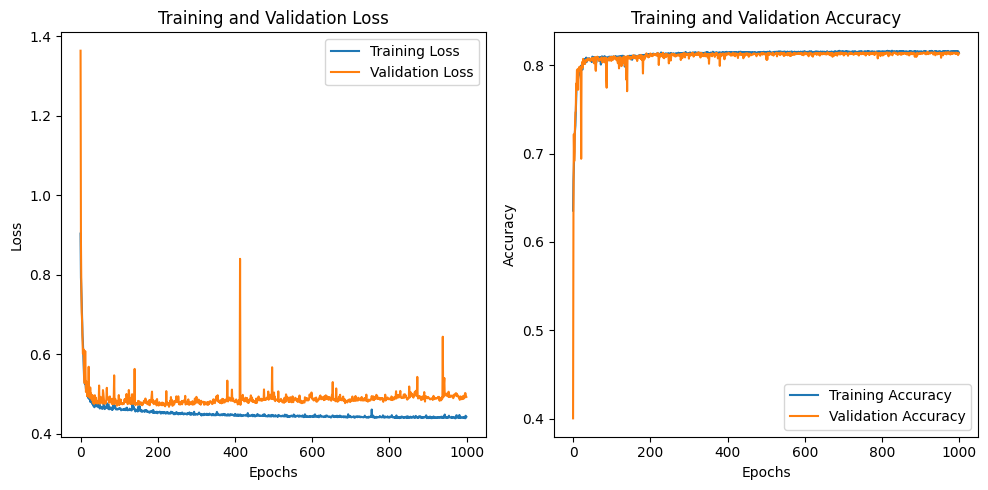

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the neural network model
model_2 = Sequential()
model_2.add(Conv1D(filters=128, kernel_size=7, strides=1, activation='relu', input_shape=(X_train.shape[1], 1)))
model_2.add(BatchNormalization())
model_2.add(Conv1D(filters=128, kernel_size=7, strides=1, activation='relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling1D(pool_size=2))
model_2.add(Flatten())
model_2.add(Dense(64, activation='relu'))
model_2.add(Dropout(0.1))
model_2.add(Dense(6, activation='softmax'))

# Compile the model
model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Conv1D input (assuming your features are in 2D)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Train the model
# Train the model
history2 = model_2.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

221/221 [==============================] - 1s 2ms/step


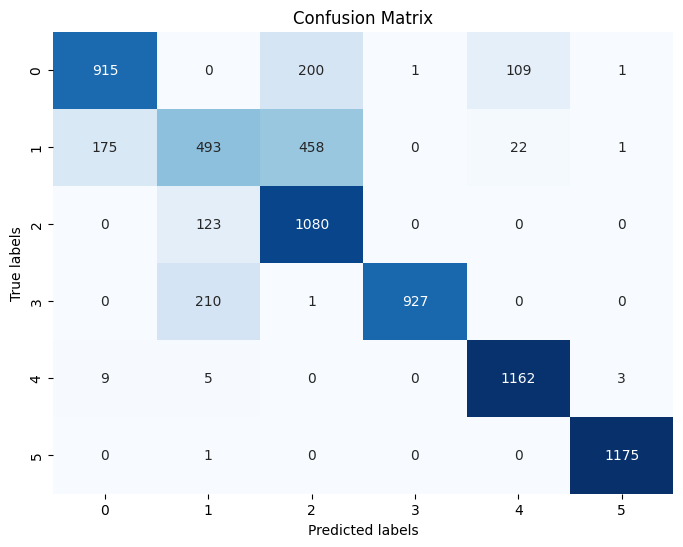


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79      1226
           1       0.59      0.43      0.50      1149
           2       0.62      0.90      0.73      1203
           3       1.00      0.81      0.90      1138
           4       0.90      0.99      0.94      1179
           5       1.00      1.00      1.00      1176

    accuracy                           0.81      7071
   macro avg       0.82      0.81      0.81      7071
weighted avg       0.82      0.81      0.81      7071



In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
y_pred_prob_2 = model_2.predict(X_test)

# Derive predicted classes from probabilities
y_pred_2 = np.argmax(y_pred_prob_2, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_2)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_2)
print("\nClassification Report:")
print(class_report)

Epoch 1/1000
258/258 [==============================] - 6s 17ms/step - loss: 0.8516 - accuracy: 0.6560 - val_loss: 1.8705 - val_accuracy: 0.3504
Epoch 2/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.7401 - accuracy: 0.6928 - val_loss: 1.1125 - val_accuracy: 0.5725
Epoch 3/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.6690 - accuracy: 0.7221 - val_loss: 0.6267 - val_accuracy: 0.7464
Epoch 4/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.5915 - accuracy: 0.7564 - val_loss: 0.5891 - val_accuracy: 0.7846
Epoch 5/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.5464 - accuracy: 0.7730 - val_loss: 0.7015 - val_accuracy: 0.6463
Epoch 6/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.5423 - accuracy: 0.7718 - val_loss: 0.5191 - val_accuracy: 0.7944
Epoch 7/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.5169 - accuracy: 0.7860 - val_loss: 0.5132 - val_ac

258/258 [==============================] - 3s 13ms/step - loss: 0.4694 - accuracy: 0.8051 - val_loss: 0.4704 - val_accuracy: 0.8072
Epoch 58/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4605 - accuracy: 0.8094 - val_loss: 0.4719 - val_accuracy: 0.8087
Epoch 59/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4632 - accuracy: 0.8071 - val_loss: 0.4721 - val_accuracy: 0.8096
Epoch 60/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4626 - accuracy: 0.8090 - val_loss: 0.4739 - val_accuracy: 0.8087
Epoch 61/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4641 - accuracy: 0.8097 - val_loss: 0.4688 - val_accuracy: 0.8101
Epoch 62/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4612 - accuracy: 0.8092 - val_loss: 0.4714 - val_accuracy: 0.8109
Epoch 63/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4634 - accuracy: 0.8077 - val_loss: 0.4720 - val_accuracy:

258/258 [==============================] - 4s 14ms/step - loss: 0.4560 - accuracy: 0.8126 - val_loss: 0.4682 - val_accuracy: 0.8125
Epoch 114/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4532 - accuracy: 0.8132 - val_loss: 0.4686 - val_accuracy: 0.8111
Epoch 115/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4545 - accuracy: 0.8115 - val_loss: 0.4720 - val_accuracy: 0.8101
Epoch 116/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4539 - accuracy: 0.8137 - val_loss: 0.4668 - val_accuracy: 0.8108
Epoch 117/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4548 - accuracy: 0.8129 - val_loss: 0.4734 - val_accuracy: 0.8089
Epoch 118/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4533 - accuracy: 0.8131 - val_loss: 0.4688 - val_accuracy: 0.8118
Epoch 119/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4513 - accuracy: 0.8134 - val_loss: 0.4938 - val_acc

Epoch 169/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4513 - accuracy: 0.8131 - val_loss: 3.9370 - val_accuracy: 0.4811
Epoch 170/1000
258/258 [==============================] - 3s 14ms/step - loss: 0.4513 - accuracy: 0.8135 - val_loss: 0.4749 - val_accuracy: 0.8130
Epoch 171/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4586 - accuracy: 0.8105 - val_loss: 0.4784 - val_accuracy: 0.8129
Epoch 172/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4525 - accuracy: 0.8123 - val_loss: 0.5256 - val_accuracy: 0.8033
Epoch 173/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4536 - accuracy: 0.8122 - val_loss: 0.4889 - val_accuracy: 0.8116
Epoch 174/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4528 - accuracy: 0.8135 - val_loss: 0.4859 - val_accuracy: 0.8125
Epoch 175/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4492 - accuracy: 0.8139 - val_loss: 0

Epoch 225/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4489 - accuracy: 0.8141 - val_loss: 0.4817 - val_accuracy: 0.8129
Epoch 226/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4476 - accuracy: 0.8144 - val_loss: 0.4778 - val_accuracy: 0.8120
Epoch 227/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4487 - accuracy: 0.8132 - val_loss: 0.4773 - val_accuracy: 0.8126
Epoch 228/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4507 - accuracy: 0.8141 - val_loss: 0.4770 - val_accuracy: 0.8125
Epoch 229/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4491 - accuracy: 0.8144 - val_loss: 0.4793 - val_accuracy: 0.8118
Epoch 230/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4506 - accuracy: 0.8124 - val_loss: 0.4839 - val_accuracy: 0.8108
Epoch 231/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4491 - accuracy: 0.8141 - val_loss: 0

Epoch 281/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4498 - accuracy: 0.8142 - val_loss: 0.4765 - val_accuracy: 0.8137
Epoch 282/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4483 - accuracy: 0.8148 - val_loss: 0.4808 - val_accuracy: 0.8118
Epoch 283/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4468 - accuracy: 0.8141 - val_loss: 0.4786 - val_accuracy: 0.8137
Epoch 284/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4486 - accuracy: 0.8145 - val_loss: 0.4736 - val_accuracy: 0.8126
Epoch 285/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4473 - accuracy: 0.8148 - val_loss: 0.4775 - val_accuracy: 0.8108
Epoch 286/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4456 - accuracy: 0.8146 - val_loss: 0.4713 - val_accuracy: 0.8143
Epoch 287/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4473 - accuracy: 0.8140 - val_loss: 0

Epoch 337/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4462 - accuracy: 0.8148 - val_loss: 0.4734 - val_accuracy: 0.8129
Epoch 338/1000
258/258 [==============================] - 3s 14ms/step - loss: 0.4445 - accuracy: 0.8151 - val_loss: 0.4876 - val_accuracy: 0.8125
Epoch 339/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4472 - accuracy: 0.8144 - val_loss: 0.4805 - val_accuracy: 0.8098
Epoch 340/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4468 - accuracy: 0.8149 - val_loss: 0.5632 - val_accuracy: 0.7705
Epoch 341/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4468 - accuracy: 0.8136 - val_loss: 0.4710 - val_accuracy: 0.8125
Epoch 342/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4465 - accuracy: 0.8149 - val_loss: 0.4774 - val_accuracy: 0.8126
Epoch 343/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4443 - accuracy: 0.8150 - val_loss: 0

Epoch 393/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4463 - accuracy: 0.8148 - val_loss: 0.4885 - val_accuracy: 0.8113
Epoch 394/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4447 - accuracy: 0.8154 - val_loss: 0.4781 - val_accuracy: 0.8133
Epoch 395/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4458 - accuracy: 0.8149 - val_loss: 0.4827 - val_accuracy: 0.8129
Epoch 396/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4456 - accuracy: 0.8157 - val_loss: 0.4740 - val_accuracy: 0.8130
Epoch 397/1000
258/258 [==============================] - 3s 14ms/step - loss: 0.4462 - accuracy: 0.8146 - val_loss: 0.5041 - val_accuracy: 0.7951
Epoch 398/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4461 - accuracy: 0.8146 - val_loss: 0.4849 - val_accuracy: 0.8119
Epoch 399/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4457 - accuracy: 0.8149 - val_loss: 0

Epoch 449/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4433 - accuracy: 0.8157 - val_loss: 0.4788 - val_accuracy: 0.8139
Epoch 450/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4428 - accuracy: 0.8157 - val_loss: 0.4821 - val_accuracy: 0.8105
Epoch 451/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4431 - accuracy: 0.8154 - val_loss: 0.4777 - val_accuracy: 0.8137
Epoch 452/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4460 - accuracy: 0.8141 - val_loss: 0.4752 - val_accuracy: 0.8133
Epoch 453/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4448 - accuracy: 0.8149 - val_loss: 0.4733 - val_accuracy: 0.8123
Epoch 454/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4429 - accuracy: 0.8159 - val_loss: 0.4754 - val_accuracy: 0.8132
Epoch 455/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4446 - accuracy: 0.8151 - val_loss: 0

Epoch 505/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4432 - accuracy: 0.8154 - val_loss: 0.4834 - val_accuracy: 0.8128
Epoch 506/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4445 - accuracy: 0.8148 - val_loss: 0.4909 - val_accuracy: 0.8108
Epoch 507/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4423 - accuracy: 0.8152 - val_loss: 0.4789 - val_accuracy: 0.8135
Epoch 508/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4419 - accuracy: 0.8152 - val_loss: 0.4778 - val_accuracy: 0.8123
Epoch 509/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4432 - accuracy: 0.8157 - val_loss: 0.4782 - val_accuracy: 0.8116
Epoch 510/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4445 - accuracy: 0.8157 - val_loss: 0.4828 - val_accuracy: 0.8130
Epoch 511/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4455 - accuracy: 0.8147 - val_loss: 0

Epoch 561/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4429 - accuracy: 0.8160 - val_loss: 0.4835 - val_accuracy: 0.8139
Epoch 562/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4415 - accuracy: 0.8161 - val_loss: 0.4840 - val_accuracy: 0.8137
Epoch 563/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4432 - accuracy: 0.8156 - val_loss: 0.4847 - val_accuracy: 0.8135
Epoch 564/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4432 - accuracy: 0.8152 - val_loss: 0.4852 - val_accuracy: 0.8115
Epoch 565/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4430 - accuracy: 0.8160 - val_loss: 0.4834 - val_accuracy: 0.8133
Epoch 566/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4427 - accuracy: 0.8149 - val_loss: 0.4852 - val_accuracy: 0.8122
Epoch 567/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4417 - accuracy: 0.8160 - val_loss: 0

Epoch 617/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4445 - accuracy: 0.8158 - val_loss: 0.5154 - val_accuracy: 0.8065
Epoch 618/1000
258/258 [==============================] - 3s 14ms/step - loss: 0.4437 - accuracy: 0.8155 - val_loss: 0.4892 - val_accuracy: 0.8146
Epoch 619/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4411 - accuracy: 0.8160 - val_loss: 0.4856 - val_accuracy: 0.8133
Epoch 620/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4424 - accuracy: 0.8151 - val_loss: 0.4786 - val_accuracy: 0.8139
Epoch 621/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4413 - accuracy: 0.8159 - val_loss: 0.4799 - val_accuracy: 0.8142
Epoch 622/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4426 - accuracy: 0.8157 - val_loss: 0.4818 - val_accuracy: 0.8132
Epoch 623/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4418 - accuracy: 0.8162 - val_loss: 0

Epoch 673/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4419 - accuracy: 0.8154 - val_loss: 0.5059 - val_accuracy: 0.7989
Epoch 674/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4421 - accuracy: 0.8159 - val_loss: 0.4852 - val_accuracy: 0.8122
Epoch 675/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4413 - accuracy: 0.8154 - val_loss: 0.4858 - val_accuracy: 0.8129
Epoch 676/1000
258/258 [==============================] - 3s 12ms/step - loss: 0.4420 - accuracy: 0.8156 - val_loss: 0.4844 - val_accuracy: 0.8137
Epoch 677/1000
258/258 [==============================] - 3s 11ms/step - loss: 0.4411 - accuracy: 0.8161 - val_loss: 0.4826 - val_accuracy: 0.8136
Epoch 678/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4421 - accuracy: 0.8154 - val_loss: 0.4910 - val_accuracy: 0.8133
Epoch 679/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4422 - accuracy: 0.8156 - val_loss: 0

Epoch 729/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4435 - accuracy: 0.8156 - val_loss: 0.5290 - val_accuracy: 0.8095
Epoch 730/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4439 - accuracy: 0.8148 - val_loss: 0.4796 - val_accuracy: 0.8132
Epoch 731/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4423 - accuracy: 0.8158 - val_loss: 0.4833 - val_accuracy: 0.8135
Epoch 732/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4425 - accuracy: 0.8160 - val_loss: 0.4839 - val_accuracy: 0.8126
Epoch 733/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4428 - accuracy: 0.8155 - val_loss: 0.4880 - val_accuracy: 0.8139
Epoch 734/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4408 - accuracy: 0.8163 - val_loss: 0.4843 - val_accuracy: 0.8128
Epoch 735/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4407 - accuracy: 0.8158 - val_loss: 0

Epoch 785/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4412 - accuracy: 0.8159 - val_loss: 0.5025 - val_accuracy: 0.7973
Epoch 786/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4419 - accuracy: 0.8158 - val_loss: 0.4959 - val_accuracy: 0.8133
Epoch 787/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4422 - accuracy: 0.8155 - val_loss: 0.4969 - val_accuracy: 0.8128
Epoch 788/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4418 - accuracy: 0.8160 - val_loss: 0.4880 - val_accuracy: 0.8132
Epoch 789/1000
258/258 [==============================] - 3s 14ms/step - loss: 0.4429 - accuracy: 0.8154 - val_loss: 0.4900 - val_accuracy: 0.8146
Epoch 790/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4405 - accuracy: 0.8166 - val_loss: 0.4959 - val_accuracy: 0.8133
Epoch 791/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4410 - accuracy: 0.8160 - val_loss: 0

Epoch 841/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4427 - accuracy: 0.8151 - val_loss: 0.4911 - val_accuracy: 0.8115
Epoch 842/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4414 - accuracy: 0.8154 - val_loss: 0.4945 - val_accuracy: 0.8123
Epoch 843/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4414 - accuracy: 0.8154 - val_loss: 0.5050 - val_accuracy: 0.8116
Epoch 844/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4402 - accuracy: 0.8161 - val_loss: 0.4939 - val_accuracy: 0.8140
Epoch 845/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4419 - accuracy: 0.8154 - val_loss: 0.4998 - val_accuracy: 0.8126
Epoch 846/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4408 - accuracy: 0.8157 - val_loss: 0.4958 - val_accuracy: 0.8145
Epoch 847/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4409 - accuracy: 0.8154 - val_loss: 0

Epoch 897/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4407 - accuracy: 0.8159 - val_loss: 0.4974 - val_accuracy: 0.8060
Epoch 898/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4410 - accuracy: 0.8159 - val_loss: 0.4869 - val_accuracy: 0.8128
Epoch 899/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4415 - accuracy: 0.8154 - val_loss: 0.4954 - val_accuracy: 0.8149
Epoch 900/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4430 - accuracy: 0.8157 - val_loss: 0.4870 - val_accuracy: 0.8145
Epoch 901/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4421 - accuracy: 0.8155 - val_loss: 0.4920 - val_accuracy: 0.8137
Epoch 902/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4404 - accuracy: 0.8165 - val_loss: 0.4890 - val_accuracy: 0.8143
Epoch 903/1000
258/258 [==============================] - 3s 13ms/step - loss: 0.4407 - accuracy: 0.8160 - val_loss: 0

Epoch 953/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4387 - accuracy: 0.8165 - val_loss: 0.4880 - val_accuracy: 0.8139
Epoch 954/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4403 - accuracy: 0.8160 - val_loss: 0.4975 - val_accuracy: 0.8128
Epoch 955/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4412 - accuracy: 0.8162 - val_loss: 0.4890 - val_accuracy: 0.8116
Epoch 956/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4412 - accuracy: 0.8149 - val_loss: 0.4921 - val_accuracy: 0.8140
Epoch 957/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4398 - accuracy: 0.8160 - val_loss: 0.4947 - val_accuracy: 0.8139
Epoch 958/1000
258/258 [==============================] - 4s 15ms/step - loss: 0.4383 - accuracy: 0.8161 - val_loss: 0.4955 - val_accuracy: 0.8130
Epoch 959/1000
258/258 [==============================] - 4s 14ms/step - loss: 0.4395 - accuracy: 0.8166 - val_loss: 0

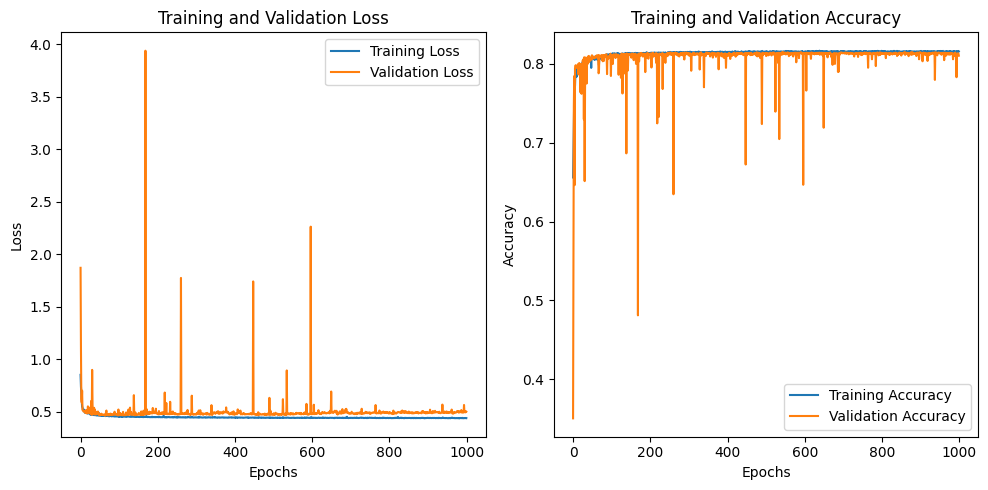

In [16]:
# Define the neural network model
model_3 = Sequential()
model_3.add(Conv1D(filters=128, kernel_size=3, strides=1, activation='relu', input_shape=(X_train.shape[1], 1)))
model_3.add(BatchNormalization())
model_3.add(Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Conv1D(filters=128, kernel_size=3, strides=1, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(MaxPooling1D(pool_size=2))
model_3.add(Flatten())
model_3.add(Dense(64, activation='relu'))
model_3.add(Dropout(0.1))
model_3.add(Dense(6, activation='softmax'))

# Compile the model
model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Reshape data for Conv1D input (assuming your features are in 2D)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

history3 = model_3.fit(X_train, y_train, epochs=1000, batch_size=64, validation_data=(X_test, y_test))

# Plot training and validation loss
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='Training Accuracy')
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

221/221 [==============================] - 0s 716us/step


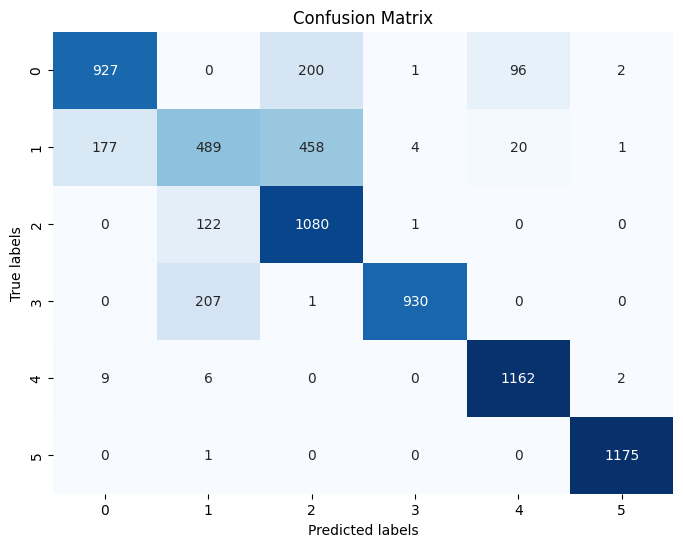


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.76      0.79      1226
           1       0.59      0.43      0.50      1149
           2       0.62      0.90      0.73      1203
           3       0.99      0.82      0.90      1138
           4       0.91      0.99      0.95      1179
           5       1.00      1.00      1.00      1176

    accuracy                           0.82      7071
   macro avg       0.82      0.81      0.81      7071
weighted avg       0.82      0.82      0.81      7071



In [17]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Predict probabilities on test data
y_pred_prob_3 = model.predict(X_test)

# Derive predicted classes from probabilities
y_pred_3 = np.argmax(y_pred_prob_3, axis=1)

import matplotlib.pyplot as plt
import seaborn as sns

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_3)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(y_test, y_pred_3)
print("\nClassification Report:")
print(class_report)

Classifier: Random Forest
Accuracy: 0.8063604240282686
Confusion Matrix:
[[168   0  41   0  16   0]
 [ 44  97  93   0   8   1]
 [  0  21 209   0   0   0]
 [  0  45   1 182   0   0]
 [  2   1   0   0 252   0]
 [  0   1   0   0   0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       225
           1       0.59      0.40      0.48       243
           2       0.61      0.91      0.73       230
           3       1.00      0.80      0.89       228
           4       0.91      0.99      0.95       255
           5       1.00      1.00      1.00       234

    accuracy                           0.81      1415
   macro avg       0.81      0.81      0.80      1415
weighted avg       0.81      0.81      0.80      1415



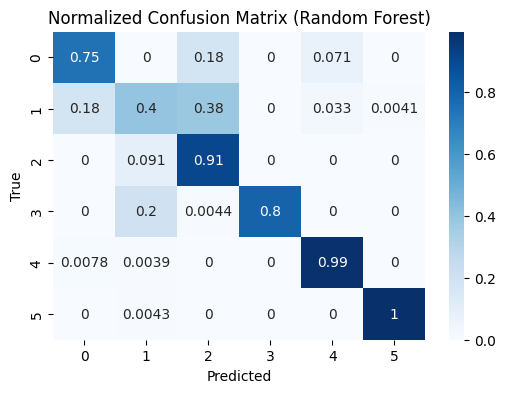

Classifier: KNN
Accuracy: 0.768904593639576
Confusion Matrix:
[[168   0  41   0  16   0]
 [ 44   0  93  97   8   1]
 [  0   0 209  21   0   0]
 [  0   1   1 226   0   0]
 [  1   0   0   2 252   0]
 [  0   0   0   1   0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       225
           1       0.00      0.00      0.00       243
           2       0.61      0.91      0.73       230
           3       0.65      0.99      0.79       228
           4       0.91      0.99      0.95       255
           5       1.00      1.00      1.00       234

    accuracy                           0.77      1415
   macro avg       0.66      0.77      0.70      1415
weighted avg       0.66      0.77      0.70      1415



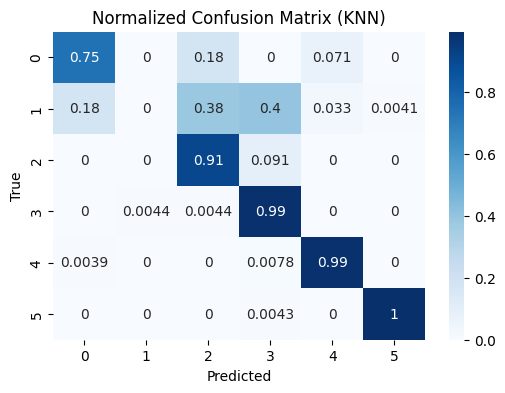

Classifier: Decision Tree
Accuracy: 0.8063604240282686
Confusion Matrix:
[[168   0  41   0  16   0]
 [ 44  97  93   0   8   1]
 [  0  21 209   0   0   0]
 [  0  45   1 182   0   0]
 [  2   1   0   0 252   0]
 [  0   1   0   0   0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       225
           1       0.59      0.40      0.48       243
           2       0.61      0.91      0.73       230
           3       1.00      0.80      0.89       228
           4       0.91      0.99      0.95       255
           5       1.00      1.00      1.00       234

    accuracy                           0.81      1415
   macro avg       0.81      0.81      0.80      1415
weighted avg       0.81      0.81      0.80      1415



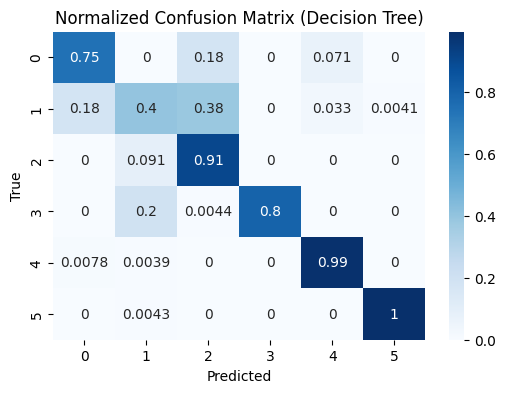

Classifier: Naive Bayes
Accuracy: 0.8070671378091873
Confusion Matrix:
[[168   0  41   0  16   0]
 [ 44  97  93   0   8   1]
 [  0  21 209   0   0   0]
 [  0  44   1 183   0   0]
 [  2   1   0   0 252   0]
 [  0   1   0   0   0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       225
           1       0.59      0.40      0.48       243
           2       0.61      0.91      0.73       230
           3       1.00      0.80      0.89       228
           4       0.91      0.99      0.95       255
           5       1.00      1.00      1.00       234

    accuracy                           0.81      1415
   macro avg       0.82      0.81      0.80      1415
weighted avg       0.82      0.81      0.80      1415



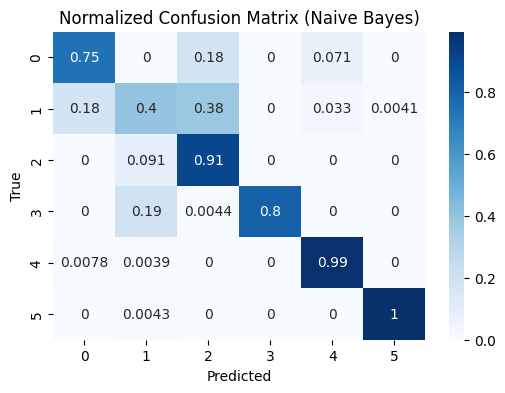

Classifier: XGBoost
Accuracy: 0.8063604240282686
Confusion Matrix:
[[168   0  41   0  16   0]
 [ 44  97  93   0   8   1]
 [  0  21 209   0   0   0]
 [  0  45   1 182   0   0]
 [  2   1   0   0 252   0]
 [  0   1   0   0   0 233]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       225
           1       0.59      0.40      0.48       243
           2       0.61      0.91      0.73       230
           3       1.00      0.80      0.89       228
           4       0.91      0.99      0.95       255
           5       1.00      1.00      1.00       234

    accuracy                           0.81      1415
   macro avg       0.81      0.81      0.80      1415
weighted avg       0.81      0.81      0.80      1415



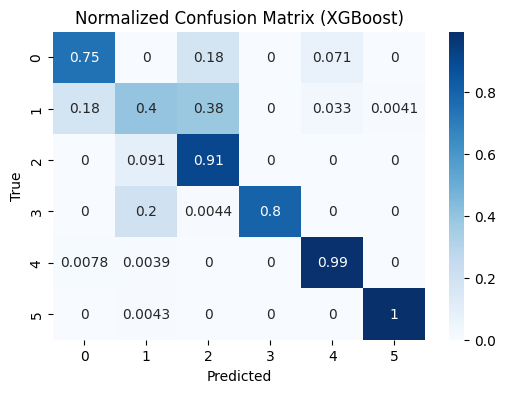

C:\Users\peter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\peter\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Classifier: AdaBoost
Accuracy: 0.5547703180212014
Confusion Matrix:
[[  0 168  41   0  16   0]
 [  0 141  93   0   9   0]
 [  0  21 209   0   0   0]
 [  0  45   1 182   0   0]
 [  0   2   0   0 253   0]
 [  0   1   0   0 233   0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       225
           1       0.37      0.58      0.45       243
           2       0.61      0.91      0.73       230
           3       1.00      0.80      0.89       228
           4       0.50      0.99      0.66       255
           5       0.00      0.00      0.00       234

    accuracy                           0.55      1415
   macro avg       0.41      0.55      0.46      1415
weighted avg       0.41      0.55      0.46      1415



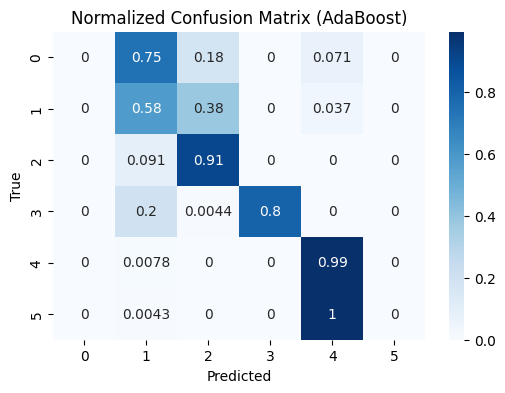

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# Assuming you have predictions from the other classifiers: knn_pred, dt_pred, nb_pred, xgb_pred, ab_pred

# Create a list of classifiers
classifiers = [
    ("Random Forest", RandomForestClassifier(n_estimators=100, random_state=42)),
    ("KNN", KNeighborsClassifier()),  # Initialize with desired parameters
    ("Decision Tree", DecisionTreeClassifier()),  # You might adjust hyperparameters here
    ("Naive Bayes", GaussianNB()),
    ("XGBoost", XGBClassifier()),
    ("AdaBoost", AdaBoostClassifier())
]

for clf_name, clf in classifiers:
    # Combine predictions into a feature matrix
    if clf_name == "Random Forest":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))  # Assuming RF predictions
    elif clf_name == "KNN":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))
    elif clf_name == "Decision Tree":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))
    elif clf_name == "Naive Bayes":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))
    elif clf_name == "XGBoost":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))
    elif clf_name == "AdaBoost":
        ensemble_features = np.column_stack((y_pred_1, y_pred_2, y_pred_3))

    # Split the data into training and validation sets
    X_train, X_val, y_train, y_val = train_test_split(ensemble_features, y_test, test_size=0.2, random_state=42)

    # Train the classifier on the training set
    clf.fit(X_train, y_train)

    # Use the trained classifier to predict on the validation set
    predictions = clf.predict(X_val)

    # Evaluate performance
    accuracy = accuracy_score(y_val, predictions)
    confusion = confusion_matrix(y_val, predictions)
    classification_rep = classification_report(y_val, predictions)

    print(f"Classifier: {clf_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Confusion Matrix:\n{confusion}")
    print(f"Classification Report:\n{classification_rep}")

    # Plot normalized confusion matrix
    normalized_conf_matrix = confusion / confusion.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(6, 4))
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues')
    plt.title(f"Normalized Confusion Matrix ({clf_name})")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
